In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

print('Matplotlib version:', mpl.__version__)
print('NumPy version:', np.__version__)

Matplotlib version: 2.0.2
NumPy version: 1.12.1


In [2]:
plt.style.use('fivethirtyeight')

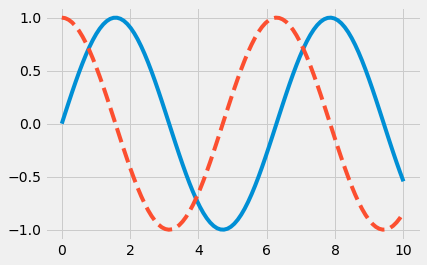

In [3]:
x = np.linspace(0, 10 ,100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.savefig('testTransparent.png', transparent=True)

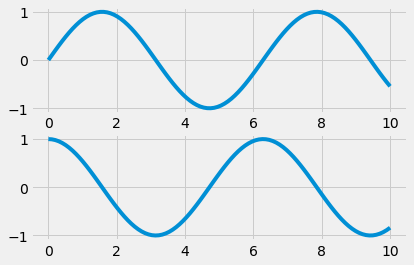

In [4]:
plt.figure() #create a figure

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

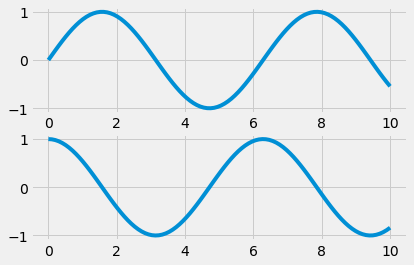

In [5]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In [6]:
plt.style.use('seaborn-whitegrid')

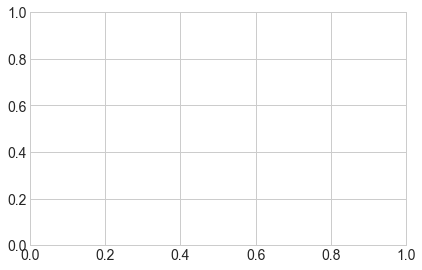

In [7]:
fig = plt.figure()
ax = plt.axes()

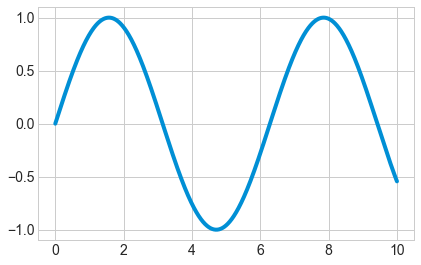

In [8]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

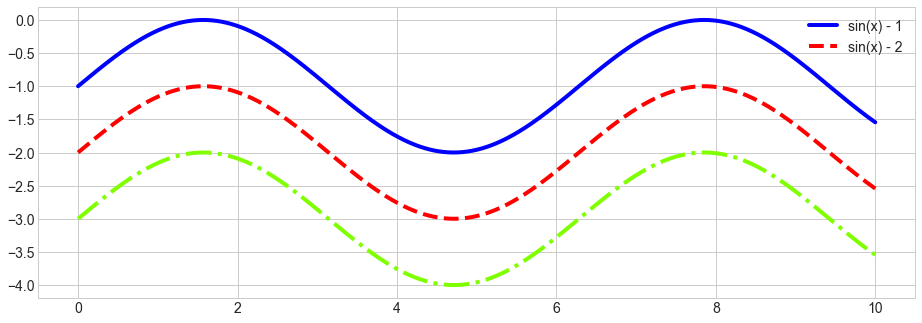

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(x, np.sin(x) - 1 , '-b', label='sin(x) - 1')
plt.plot(x, np.sin(x) - 2 , '--r', label='sin(x) - 2')
plt.plot(x, np.sin(x) - 3 , '-.', color='chartreuse')
plt.legend();

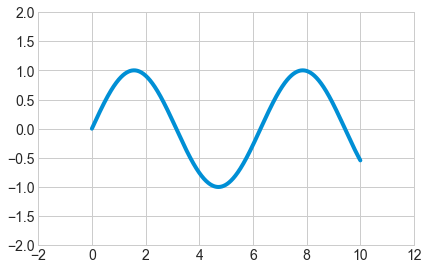

In [10]:
fig = plt.figure()
ax = plt.axes()

plt.plot(x, np.sin(x))
plt.xlim(-2,12)
plt.ylim(-2, 2);

[-3, 15, -2, 4]

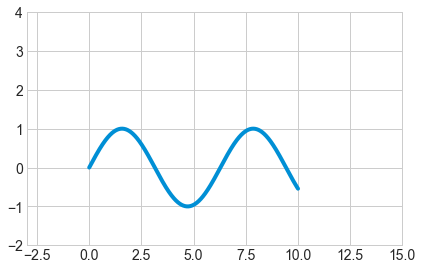

In [11]:
plt.plot(x, np.sin(x))
plt.axis([-3, 15, -2, 4])

(-0.5, 10.5, -1.0999971452300779, 1.0999995492467289)

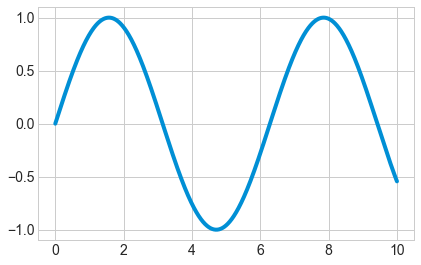

In [12]:
plt.plot(x, np.sin(x))
plt.axis('tight')

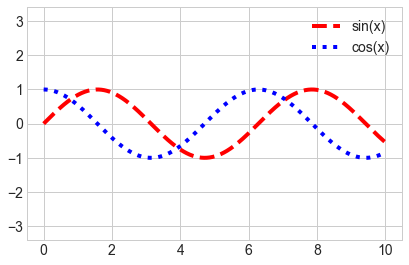

In [13]:
plt.plot(x, np.sin(x), '--r', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal');
plt.legend()

### Scatter plots

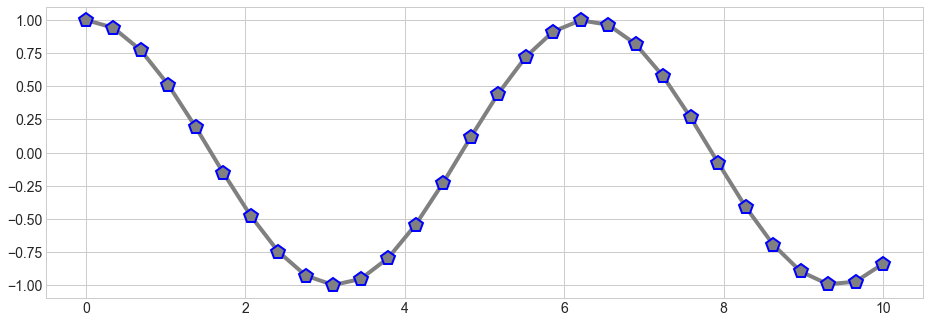

In [14]:
x = np.linspace(0, 10, 30)
y = np.cos(x)
plt.figure(figsize=(14,5))
plt.plot(x, y, '-p', color='gray'
        ,markersize=15
        ,linewidth=4
        ,markeredgecolor='blue'
        ,markeredgewidth=2);

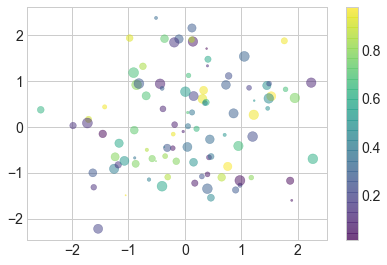

In [15]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 100 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar();

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

In [17]:
features.shape

(4, 150)

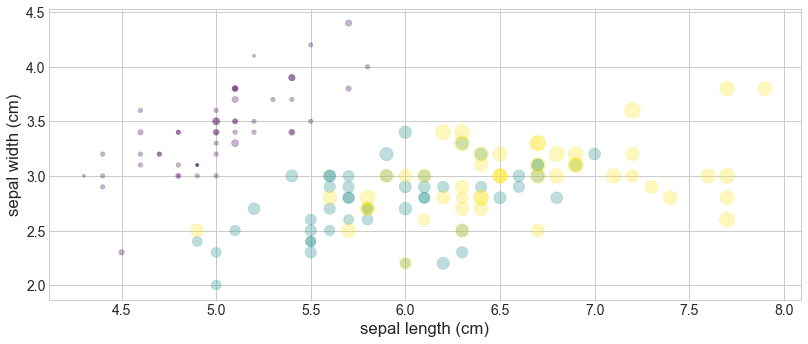

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(features[0], features[1], alpha=0.3
           ,s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

### Visualizing errors

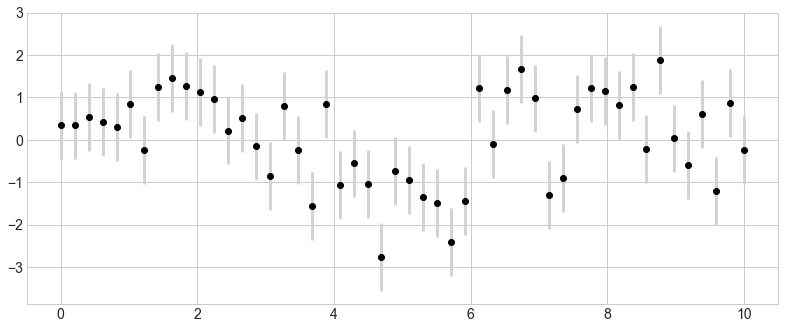

In [19]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.figure(figsize=(12,5))
plt.errorbar(x, y, yerr=dy, fmt='o',
            color='black',
            ecolor='lightgray',
            elinewidth=3,
            capsize=0);

In [20]:
from sklearn.gaussian_process import GaussianProcess

#define the model
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


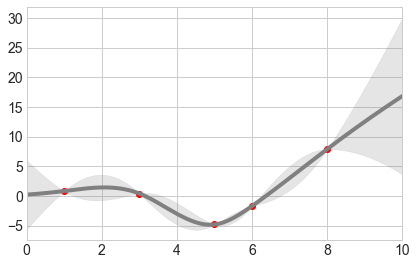

In [21]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

### Histograms, Binnings, and Density

In [22]:
data = np.random.randn(1000)

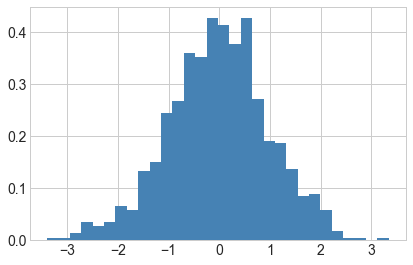

In [23]:
plt.hist(data, bins=30, normed=True, histtype='stepfilled', color='steelblue');

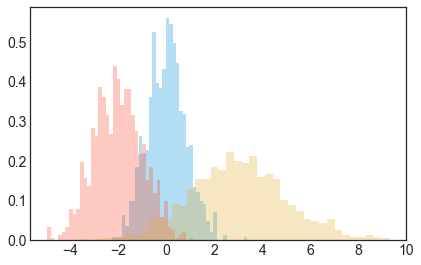

In [24]:
plt.style.use('seaborn-white')

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs= dict(histtype='stepfilled', alpha=0.3, normed=True, bins =40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### 2D Histogram

In [25]:
mean = [0, 0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [26]:
x

array([ 0.1550941 ,  1.45950384, -0.38113645, ...,  1.15309746,
        0.70430465,  0.78352351])

In [27]:
y

array([-0.76634001,  1.9441834 , -0.98505549, ...,  0.18663788,
        0.13133321, -0.74463763])

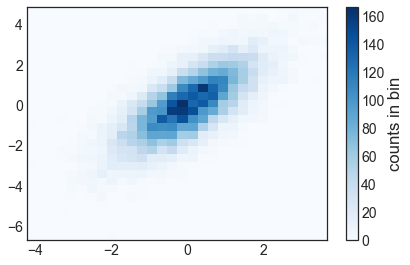

In [28]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin');

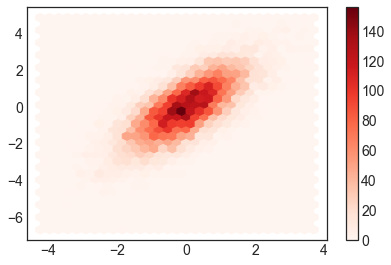

In [29]:
plt.hexbin(x, y, gridsize=30, cmap='Reds')
plt.colorbar();

### Legends

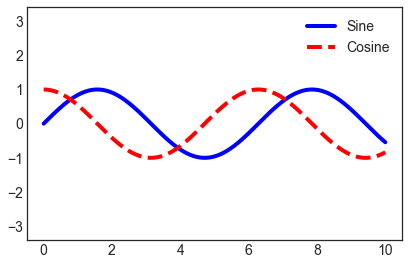

In [30]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

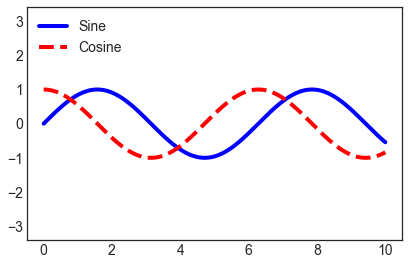

In [31]:
ax.legend(loc='upper left', frameon=False)
fig

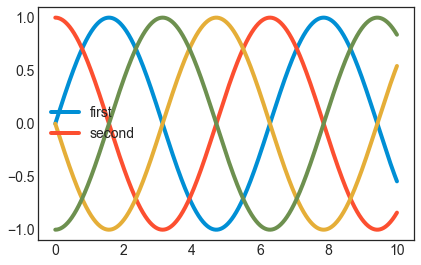

In [32]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x,y)

plt.legend(lines[:2], ['first', 'second']);

#### Example

In [33]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

In [34]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [35]:
#extract the data we are interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

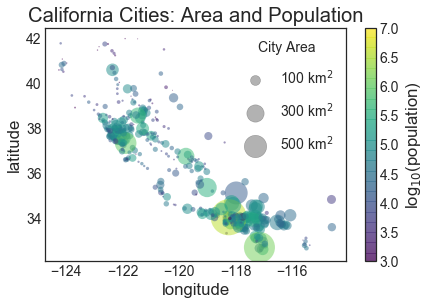

In [36]:
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

### Customizing colorbars

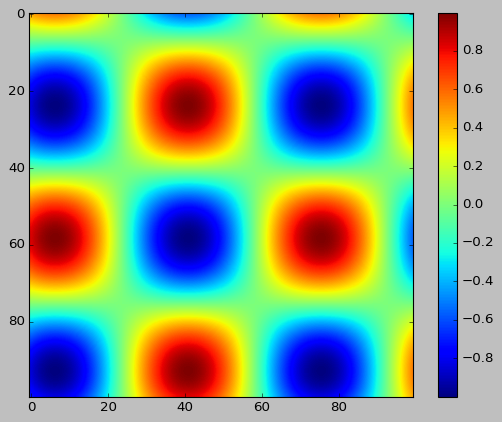

In [37]:
plt.style.use('classic')
x = np.linspace(1, 10, 100)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

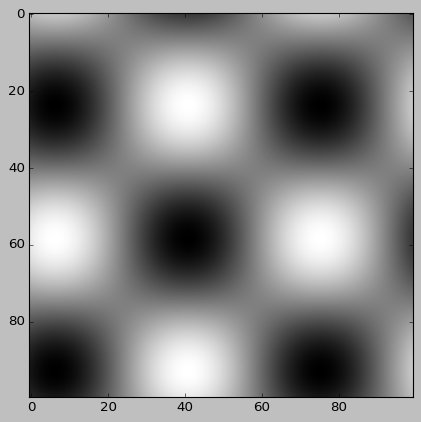

In [38]:
plt.imshow(I, cmap='gray');

### Handwritten digits example

In [39]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)

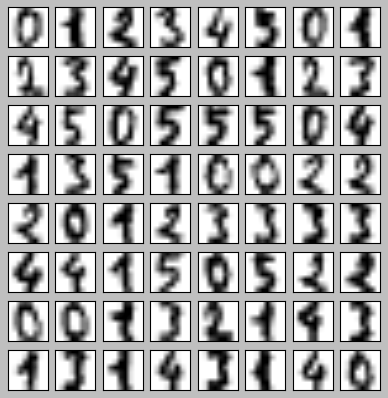

In [40]:
fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

#### Multiple Subplots

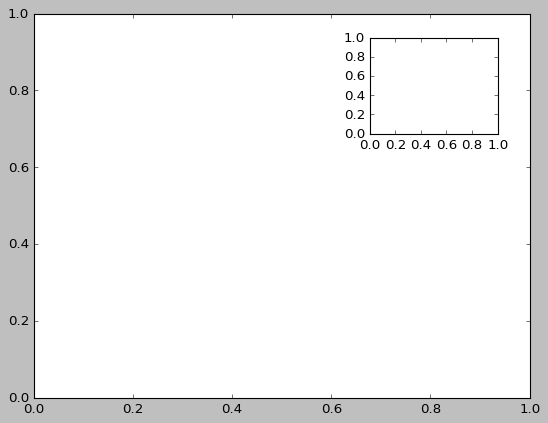

In [41]:
ax1= plt.axes()
ax2= plt.axes([0.65, 0.65, 0.2, 0.2])

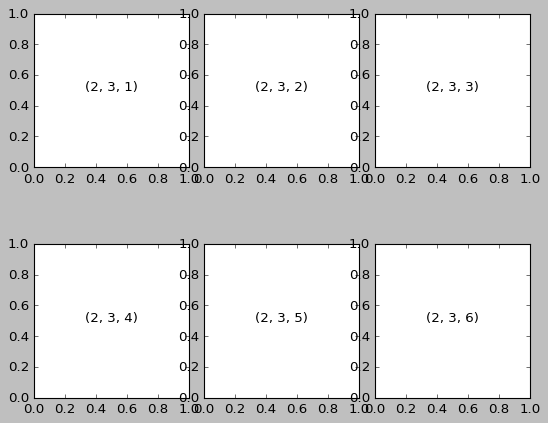

In [42]:
for i in range (1,7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2,3,i)), ha='center')
    plt.subplots_adjust(hspace=0.5, wspace=0.1)

In [43]:
plt.style.use('seaborn-whitegrid')
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [44]:
quartiles =np.percentile(births['births'], [25,50,75])
quartiles

array([ 4358. ,  4814. ,  5289.5])

In [45]:
mu, sig = quartiles[1] , 0.74 * (quartiles[2] - quartiles[0]) 

In [46]:
mu, sig

(4814.0, 689.30999999999995)

In [47]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [48]:
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

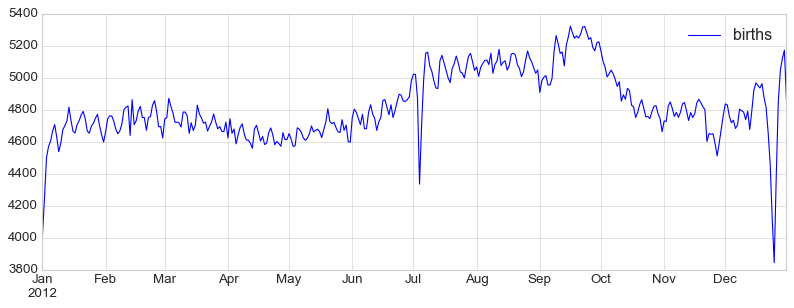

In [49]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

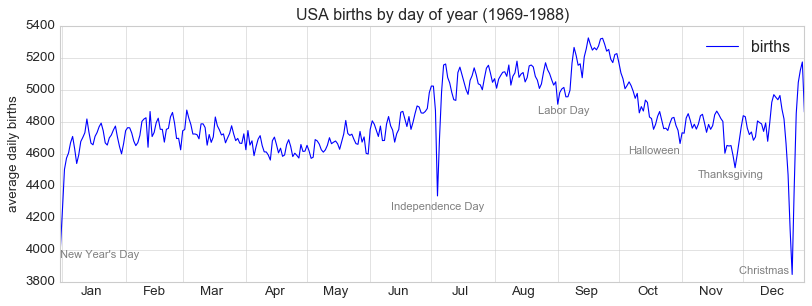

In [50]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

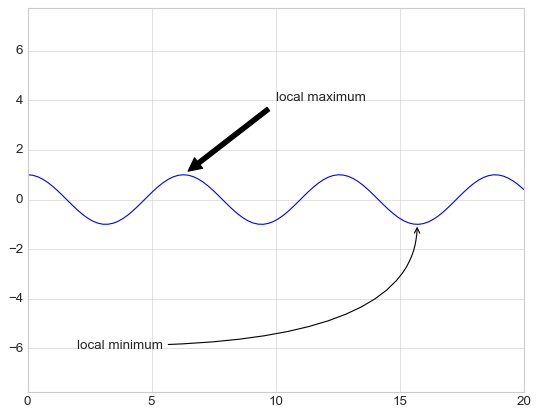

In [51]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 100)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

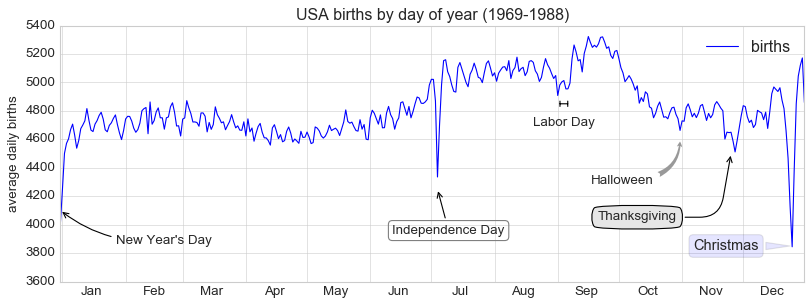

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

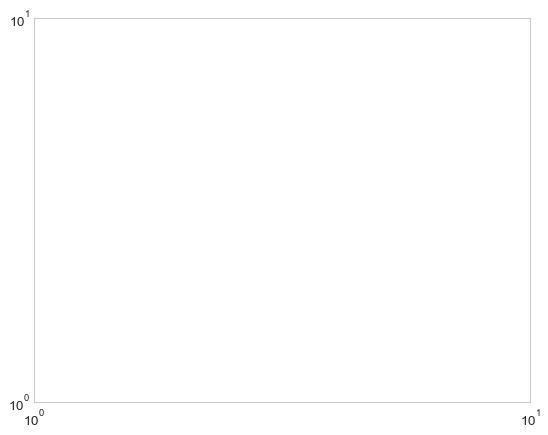

In [53]:
ax = plt.axes(xscale='log', yscale='log')

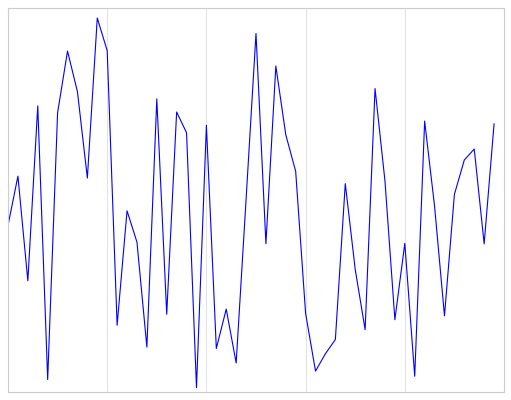

In [54]:
# remove ticks or labels
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

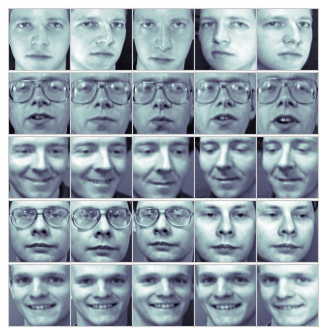

In [55]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

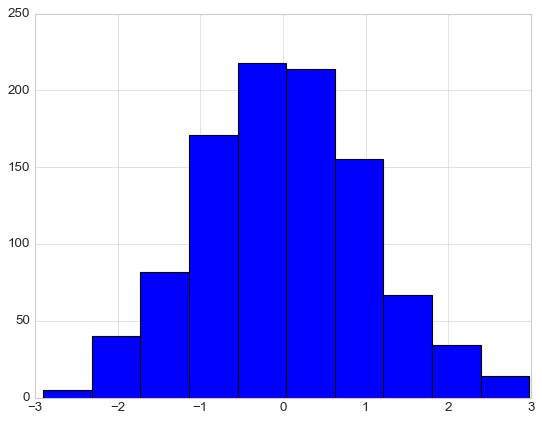

In [56]:
# customization plots
x = np.random.randn(1000)
plt.hist(x);

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


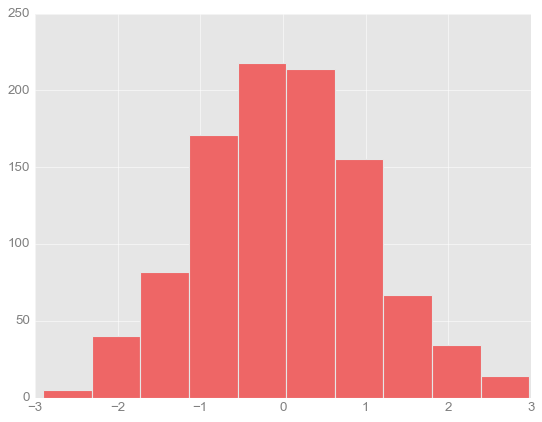

In [57]:
# use a gray background
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

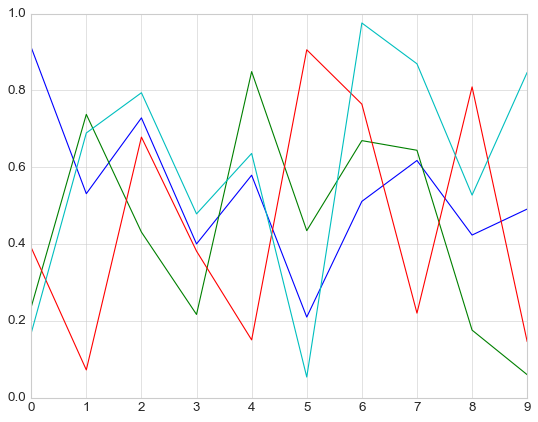

In [58]:
for i in range(4):
    plt.plot(np.random.rand(10))

In [59]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

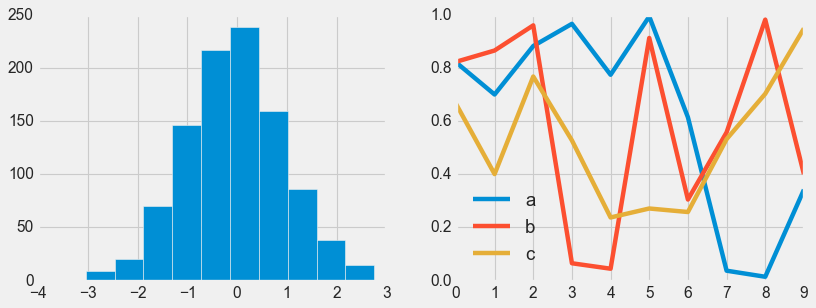

In [60]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

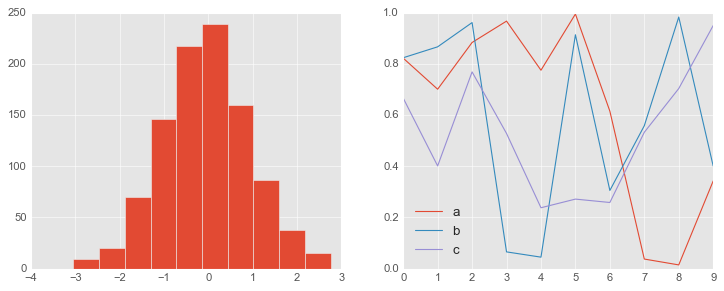

In [61]:
with plt.style.context('ggplot'):
    hist_and_lines()

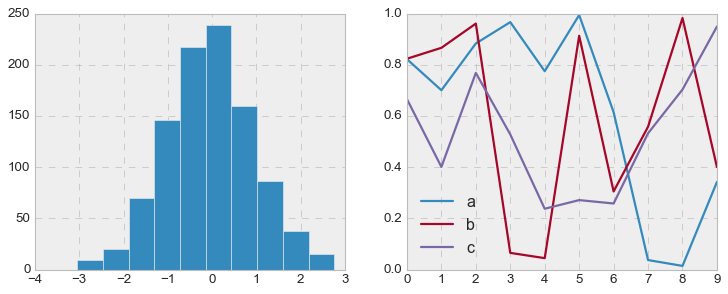

In [62]:
with plt.style.context('bmh'):
    hist_and_lines()

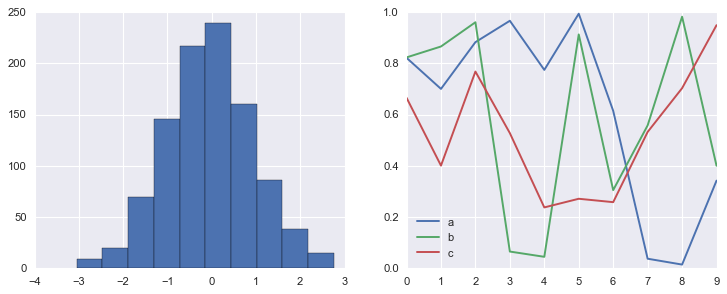

In [63]:
with plt.style.context('seaborn'):
    hist_and_lines()

In [64]:
from mpl_toolkits.basemap import Basemap

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


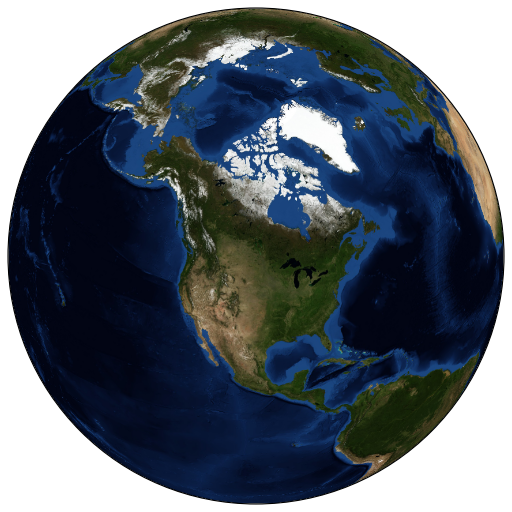

In [65]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0= 50, lon_0 = -100 )
m.bluemarble(scale=0.5)

#### Seaborn

In [66]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [67]:
plt.style.use('default')

In [68]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

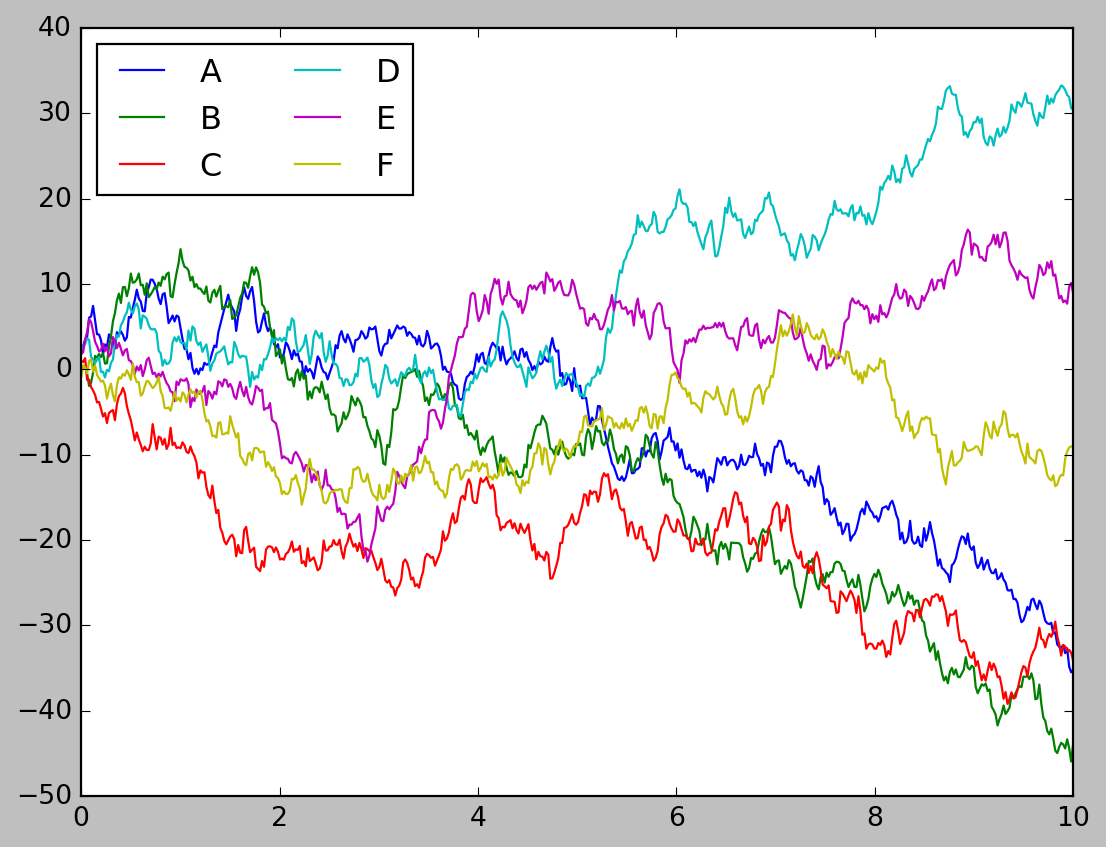

In [69]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [70]:
import seaborn as sns
sns.set()

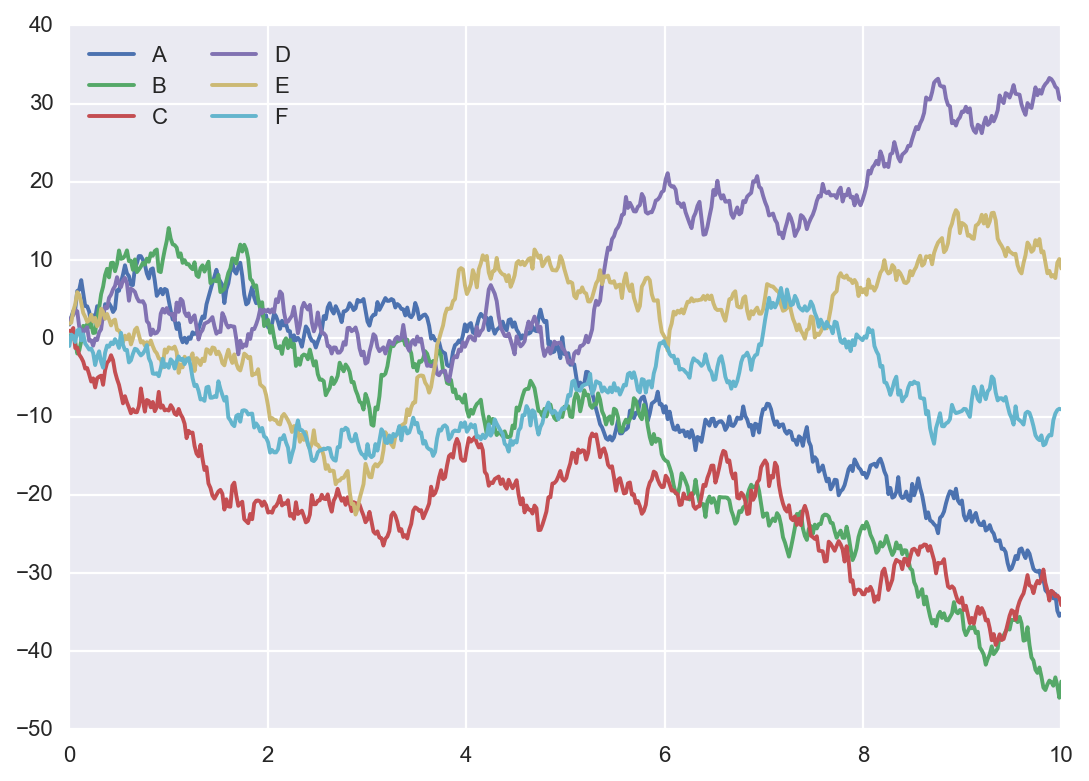

In [71]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

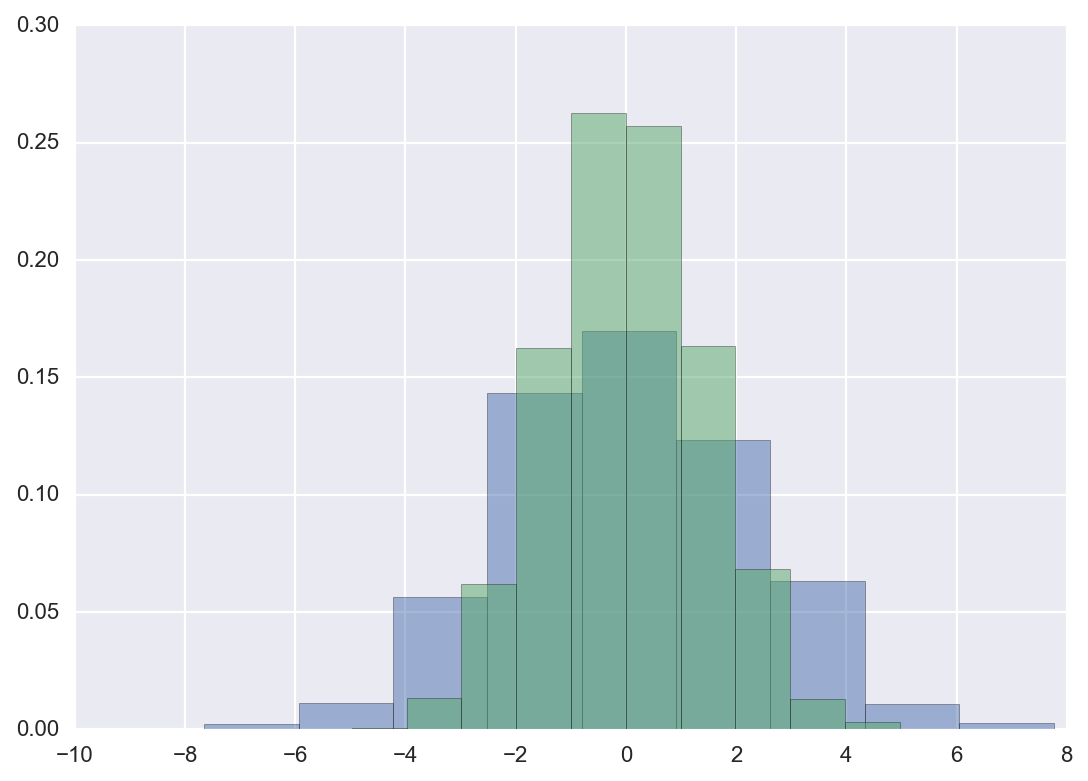

In [72]:
data = np.random.multivariate_normal([0,0], [[5,2], [2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

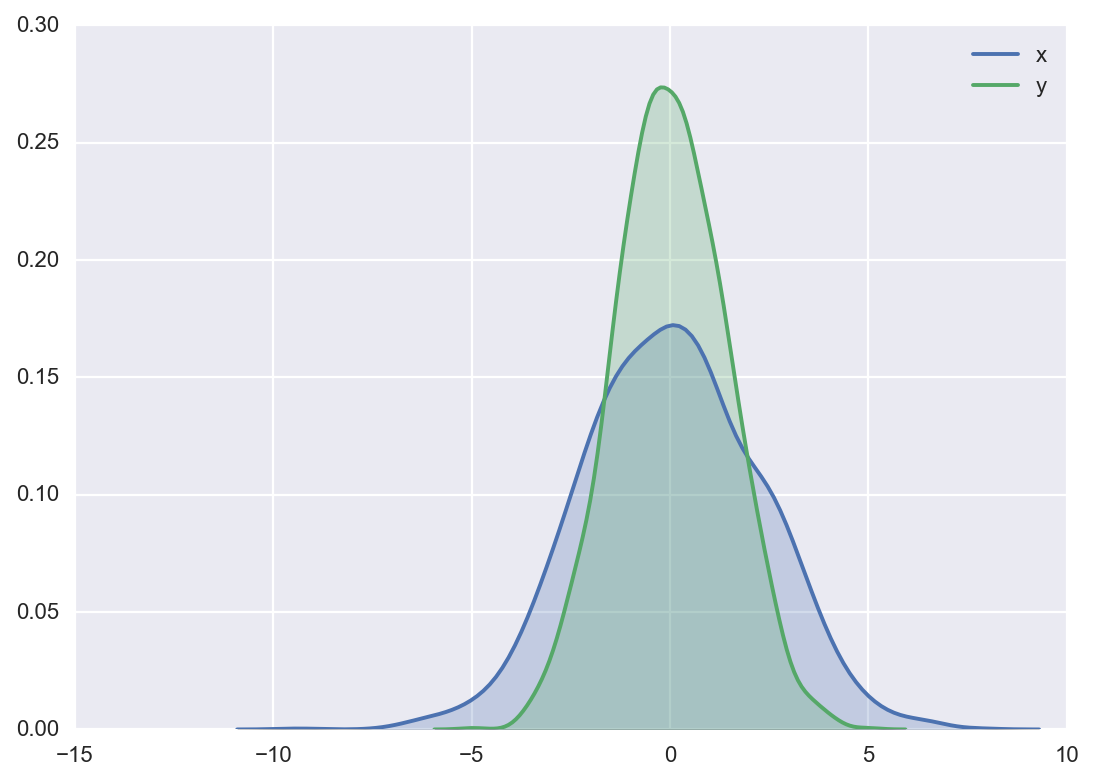

In [73]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

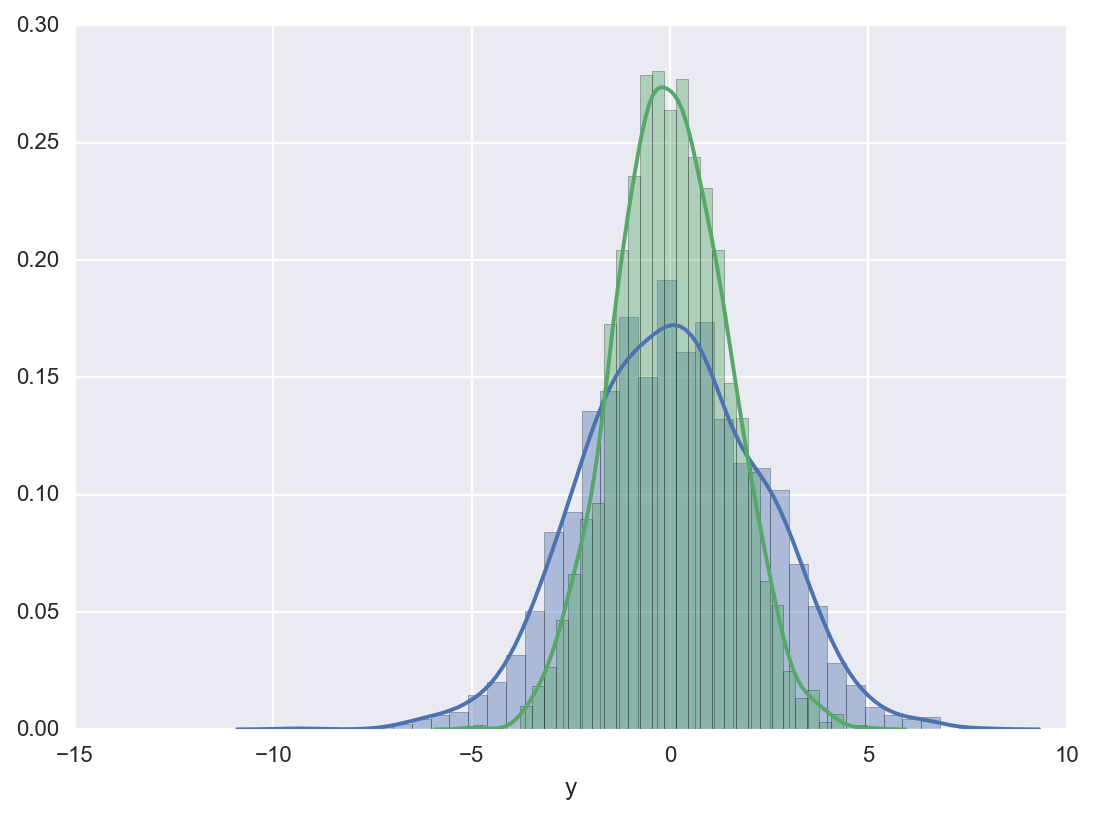

In [74]:
sns.distplot(data['x'])
sns.distplot(data['y']);

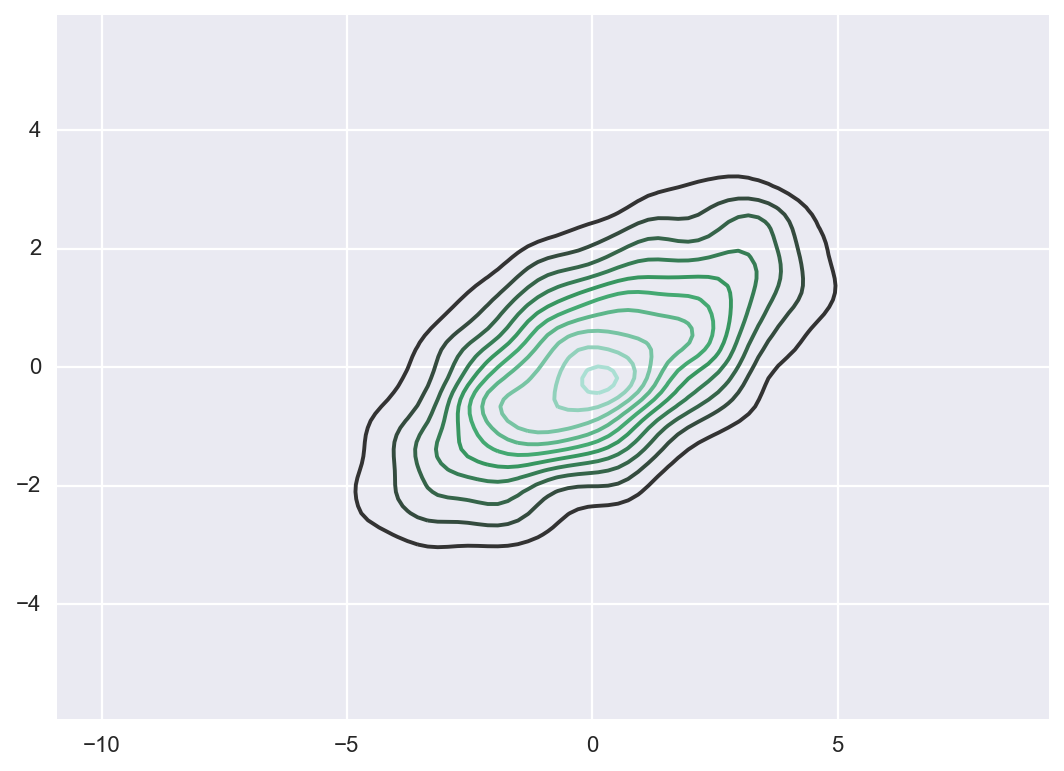

In [75]:
sns.kdeplot(data);

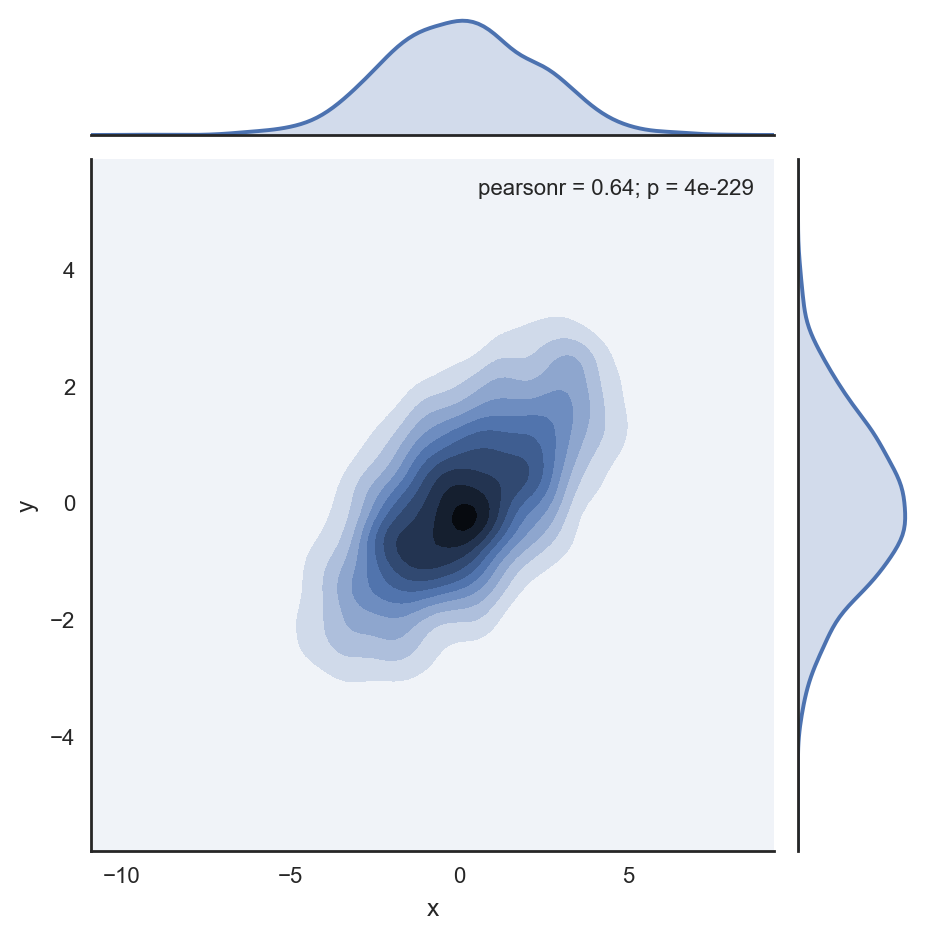

In [76]:
with sns.axes_style('white'):
    sns.jointplot('x','y', data, kind='kde')

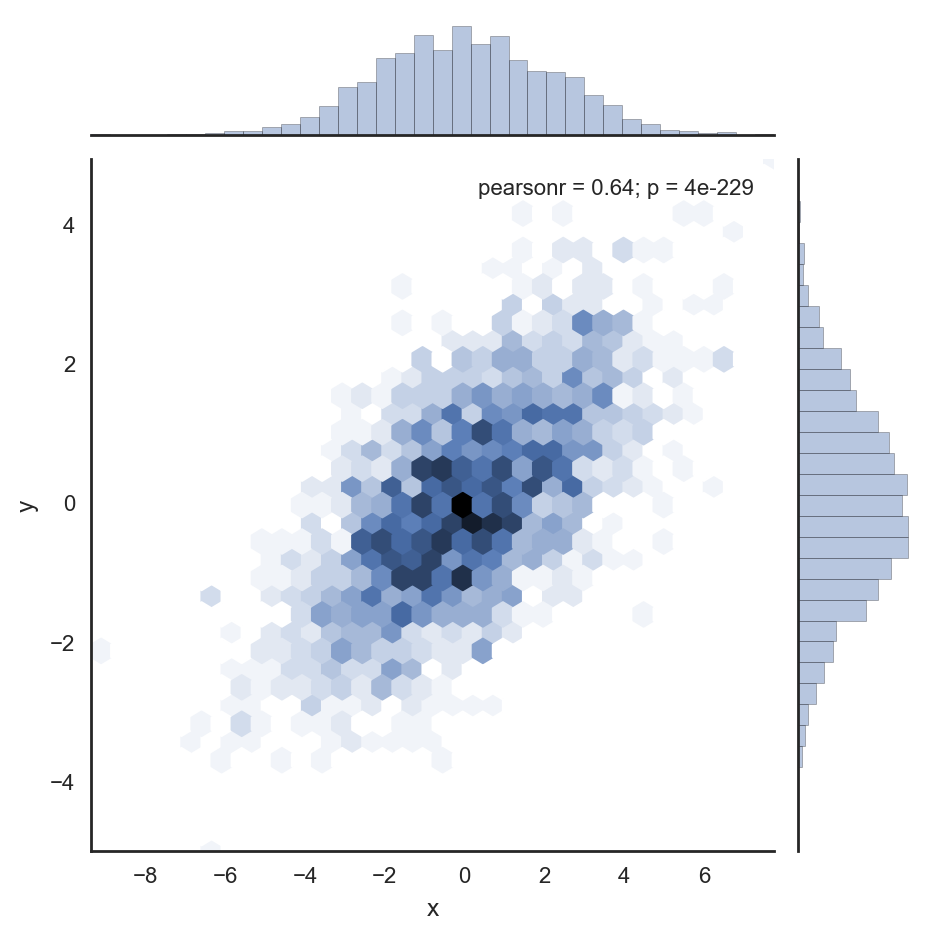

In [77]:
with sns.axes_style('white'):
    sns.jointplot('x','y', data, kind='hex')

In [78]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


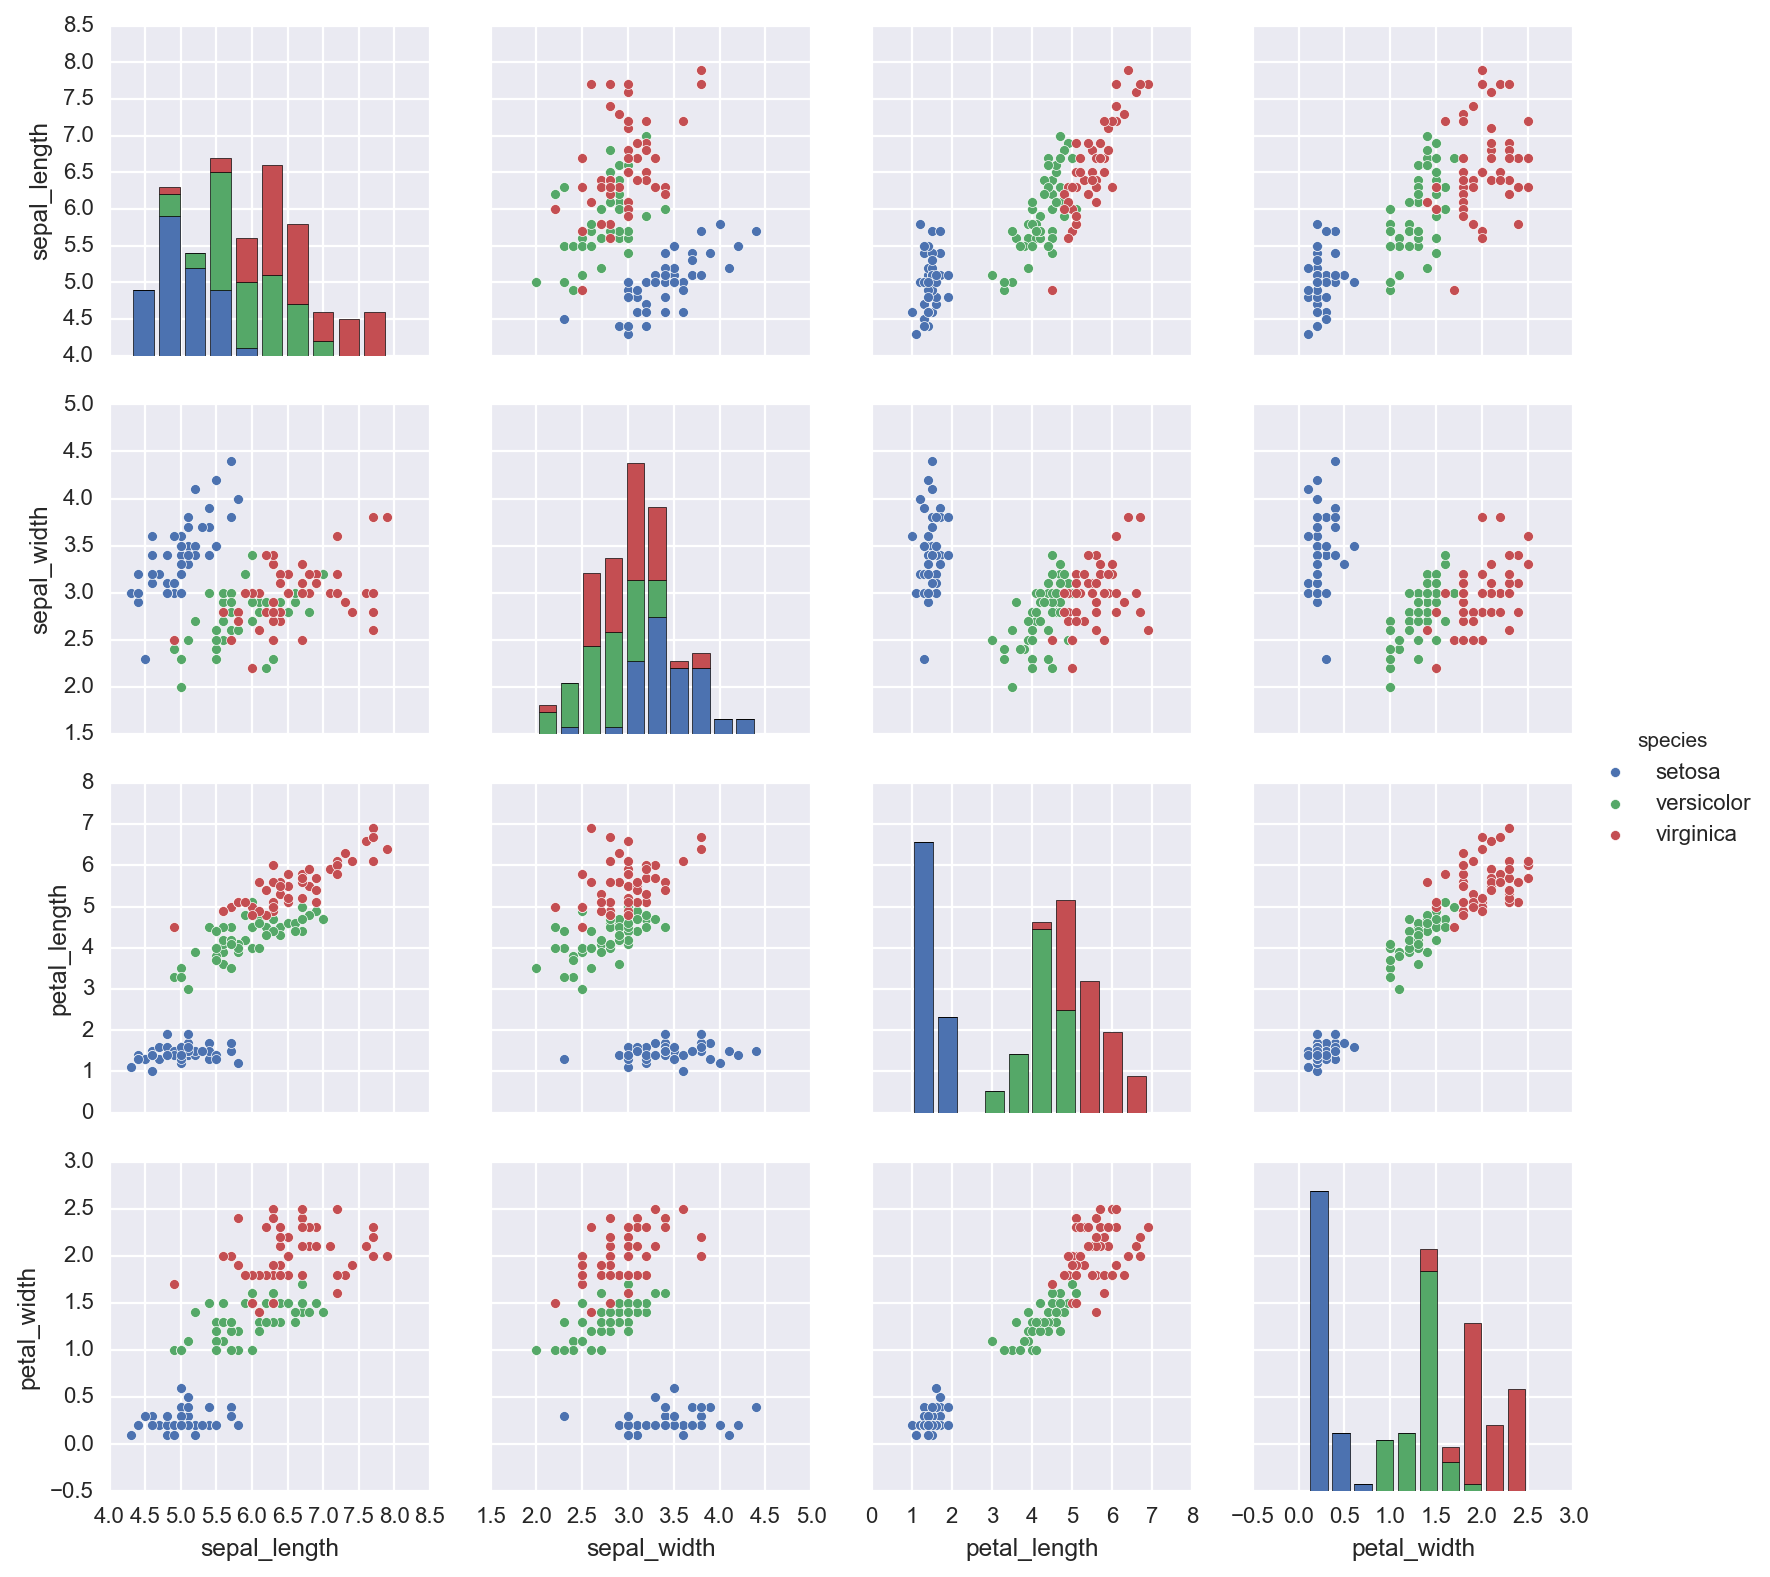

In [82]:
sns.pairplot(iris, hue='species', size=2.5);

In [83]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


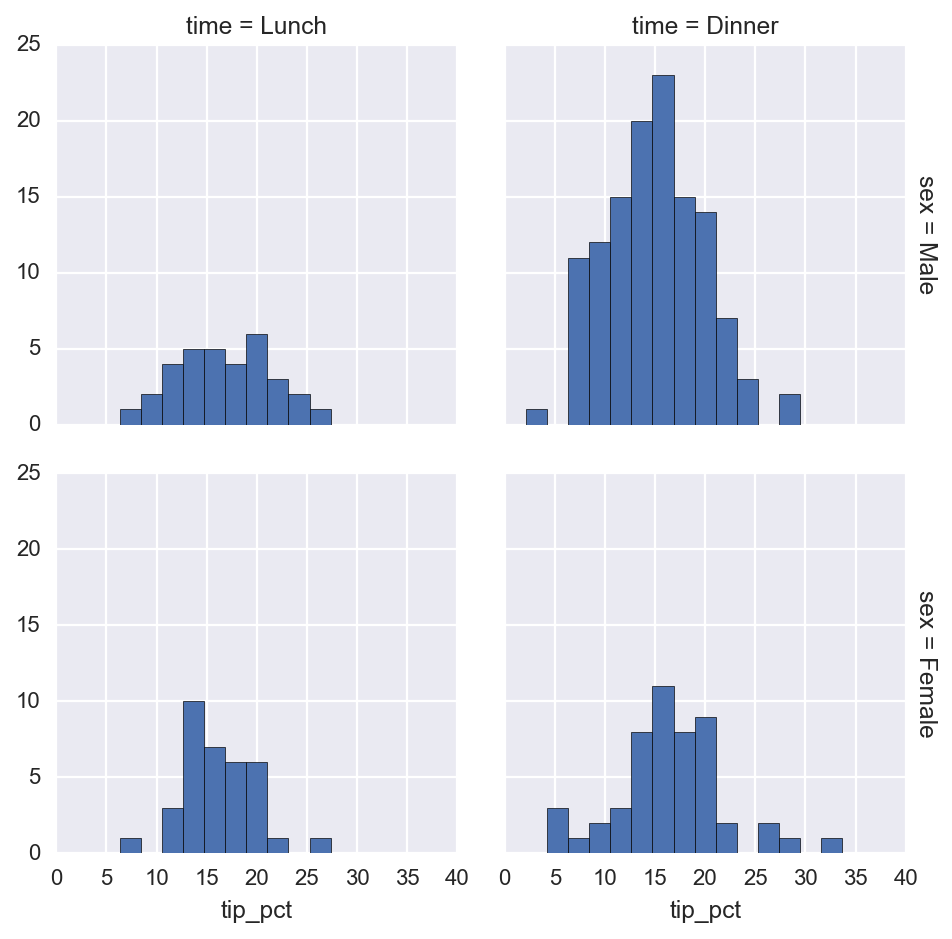

In [92]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 20));

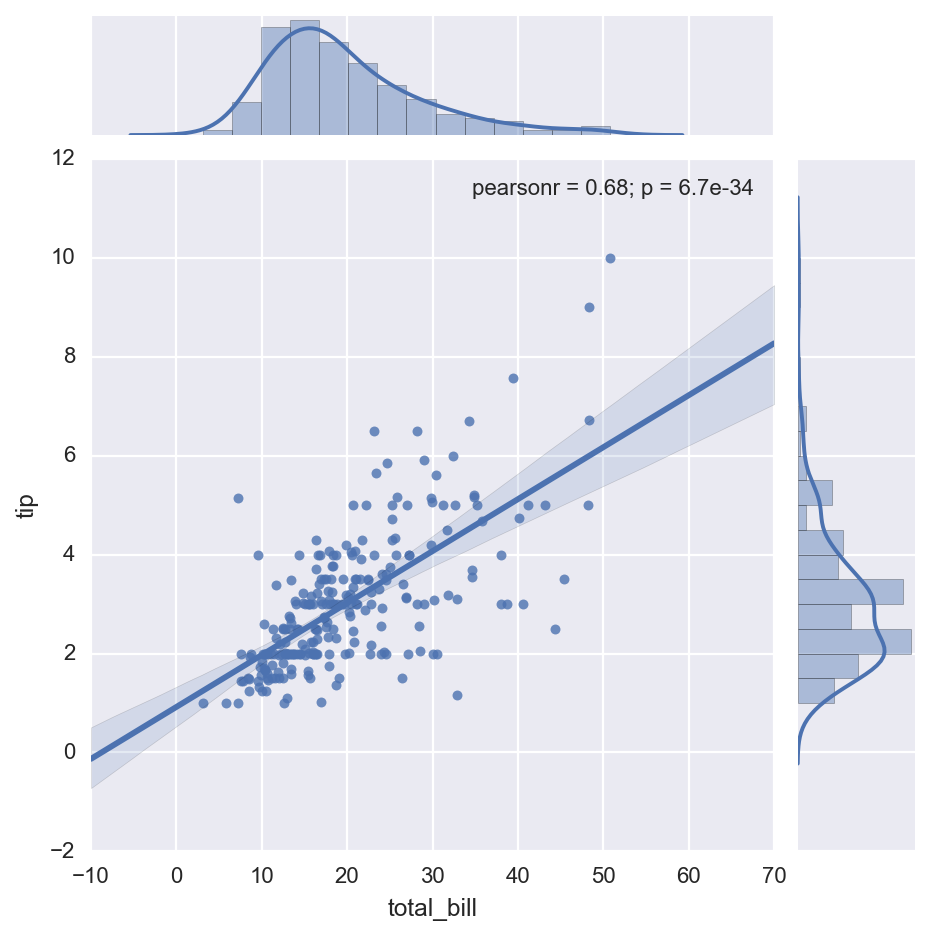

In [94]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

In [95]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


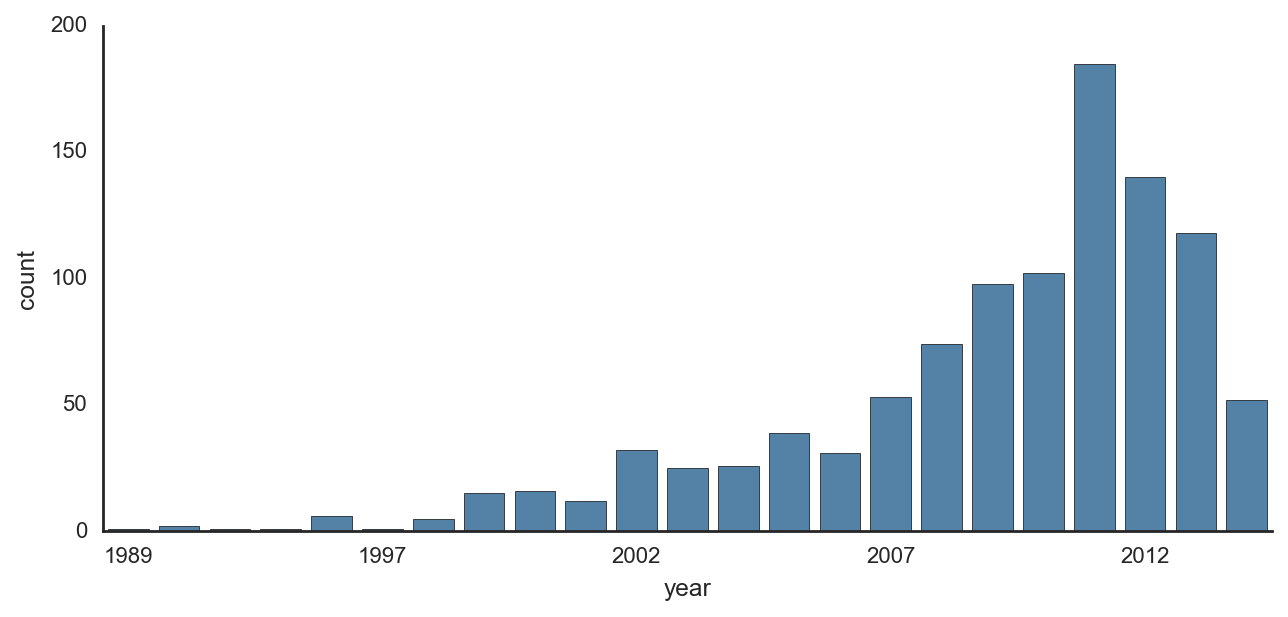

In [101]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2,
                      kind='count', color='steelblue')
    g.set_xticklabels(step=5)

####  Example